### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [2]:
n = 10
popsize = 10
generations = 3000
name = 'centered5'
#device = torch.device('mps:0')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize)

2023-02-09 22:47:19,693	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-09 22:47:22] INFO     <70724> evotorch.core: Instance of `Custom_NEProblem` (id:4433139152) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-09 22:47:22] INFO     <70724> evotorch.core: Instance of `Custom_NEProblem` (id:4433139152) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-09 22:47:22] INFO     <70724> evotorch.core: Instance of `Custom_NEProblem` (id:4433139152) -- The `device` of the problem is set as cpu
[2023-02-09 22:47:22] INFO     <70724> evotorch.core: Instance of `Custom_NEProblem` (id:4433139152) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-09 22:47:22] INFO     <70724> evotorch.core: Instance of `Custom_NEProblem` (id:4433139152) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0986)
pop_best_eval : -1644.976806640625
    mean_eval : -2013.6412353515625
  median_eval : -2154.72265625
    best_eval : -1644.976806640625
   worst_eval : -2341.16748046875

         iter : 2
     stepsize : ReadOnlyTensor(0.0974)
pop_best_eval : -1205.320068359375
    mean_eval : -1727.5706787109375
  median_eval : -1723.908935546875
    best_eval : -1205.320068359375
   worst_eval : -2341.16748046875

         iter : 3
     stepsize : ReadOnlyTensor(0.0963)
pop_best_eval : -1097.7545166015625
    mean_eval : -1659.602783203125
  median_eval : -1649.2105712890625
    best_eval : -1097.7545166015625
   worst_eval : -2341.16748046875

         iter : 4
     stepsize : ReadOnlyTensor(0.0953)
pop_best_eval : -1488.0648193359375
    mean_eval : -1781.832275390625
  median_eval : -1733.8211669921875
    best_eval : -1097.7545166015625
   worst_eval : -2341.16748046875

         iter : 5
     stepsize : ReadOnlyTensor(0.0943)
pop_best_ev

In [ ]:
network = trainer.get_trained_network()

In [ ]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'])

#### Visualize trained network

In [ ]:
organism = generate_organism(n, device)
graph = organism.toGraph()
visualizer = Visualizer()

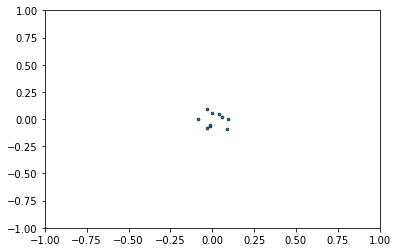

In [ ]:
anim = visualizer.animate_organism(graph, network, food=50, frames=300)
visualizer.save_animation_to_gif(anim, name, 10)

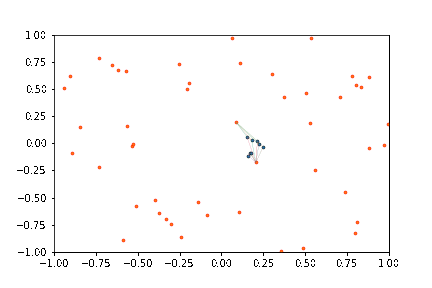

In [ ]:
Image('../animation/' + name + '.gif')

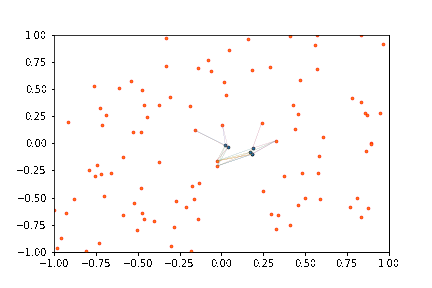

In [ ]:
Image('../animation/GATConv1.gif')

In [ ]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [ ]:
print(network)

GNCA(
  (mlp): Sequential(
    (0): Linear(in_features=8, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=5, bias=True)
    (3): ReLU()
  )
  (conv_layers): GATv2Conv(8, 8, heads=1)
)


In [ ]:
print(network.conv_layers)
for param in network.conv_layers.parameters():
  print(param.data)

GATv2Conv(8, 8, heads=1)
tensor([[[ 0.9790, -0.6381,  0.5349, -0.2973, -0.7954,  0.2427,  0.8941,
           1.4058]]])
tensor([ 0.9242, -0.3125, -0.6353, -1.5504, -0.8712,  0.4707,  0.9253,  1.7655])
tensor([[ 0.6121,  0.5382,  0.5979, -0.0540,  0.4216,  0.3323, -0.4253,  1.3298],
        [ 0.6423, -1.1417,  0.5583, -0.3294,  0.6825, -0.8467,  0.3181, -0.2738],
        [-0.2727,  0.2330, -0.1706, -1.3637,  0.2541, -0.3123, -0.0403,  0.9498],
        [ 1.7240,  0.3767,  1.0276, -0.9692, -0.7528,  1.8422, -0.4033,  0.4481],
        [ 0.4738, -0.6331,  0.3447, -0.5260, -1.3436,  0.5072,  0.9473, -0.3922],
        [ 0.2679, -0.5238,  0.6666,  0.3295, -0.4898,  0.7331,  0.7731, -0.2249],
        [-0.4234, -1.8370, -1.6028,  0.1639,  1.3327, -0.9865,  1.0060, -1.1039],
        [-1.5433,  0.9504, -0.2381, -0.8325, -0.0590,  0.7578, -1.0971,  0.2828]])
tensor([-1.9025,  1.3678, -1.0664,  0.6146,  0.4473, -0.5476,  1.2426,  0.0062])
tensor([[ 8.7249e-01, -4.9431e-01,  7.9325e-01, -1.5262e+00, 

In [ ]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>